In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def draw_line_plot():
    df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
    df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'], color='red')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    return fig

def draw_bar_plot():
    df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'])
    df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month_name()
    df_bar = df.groupby(['year', 'month'])['value'].mean().unstack()
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    df_bar = df_bar[month_order]
    fig, ax = plt.subplots(figsize=(10, 6))
    df_bar.plot(kind='bar', ax=ax)
    ax.set_title('Average Daily Page Views per Month')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months')
    return fig

def draw_box_plot():
    df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'])
    df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month_name().str[:3]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    sns.boxplot(x='year', y='value', data=df, ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='month', y='value', data=df, order=month_order, ax=ax2)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    plt.tight_layout()
    return fig

In [20]:
!wget https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv

--2025-06-25 09:11:58--  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22381 (22K) [text/plain]
Saving to: ‘fcc-forum-pageviews.csv’

fcc-forum-pageviews 100%[===================>]  21.86K  --.-KB/s    in 0s      

2025-06-25 09:11:59 (70.9 MB/s) - ‘fcc-forum-pageviews.csv’ saved [22381/22381]



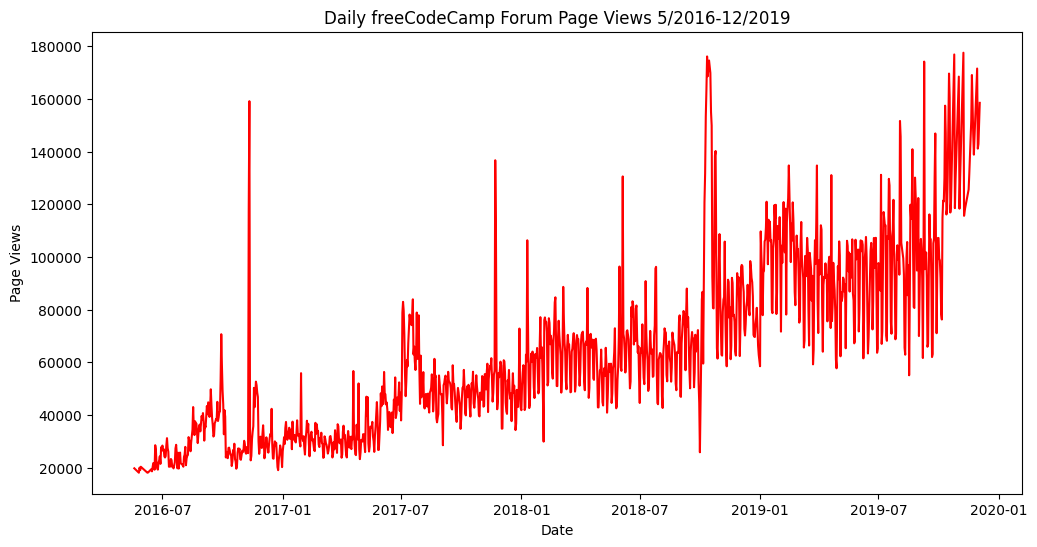

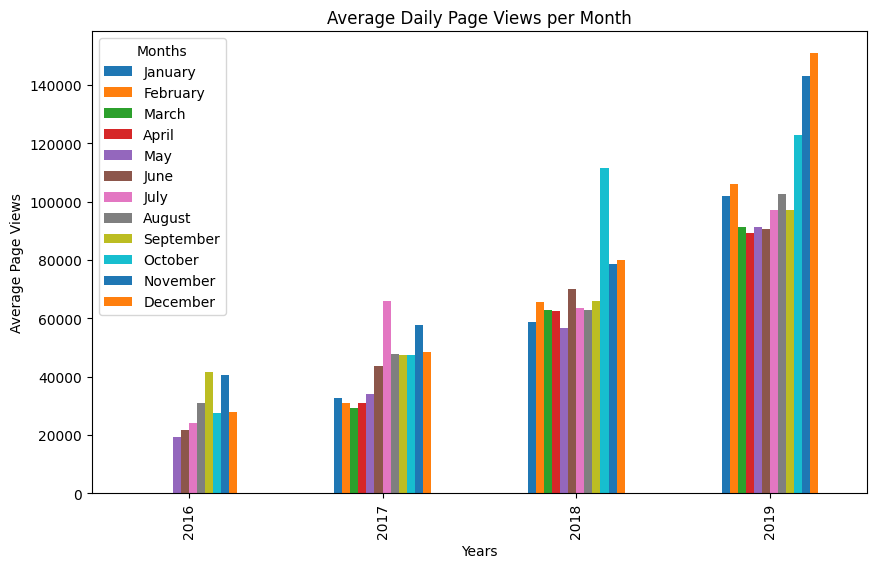

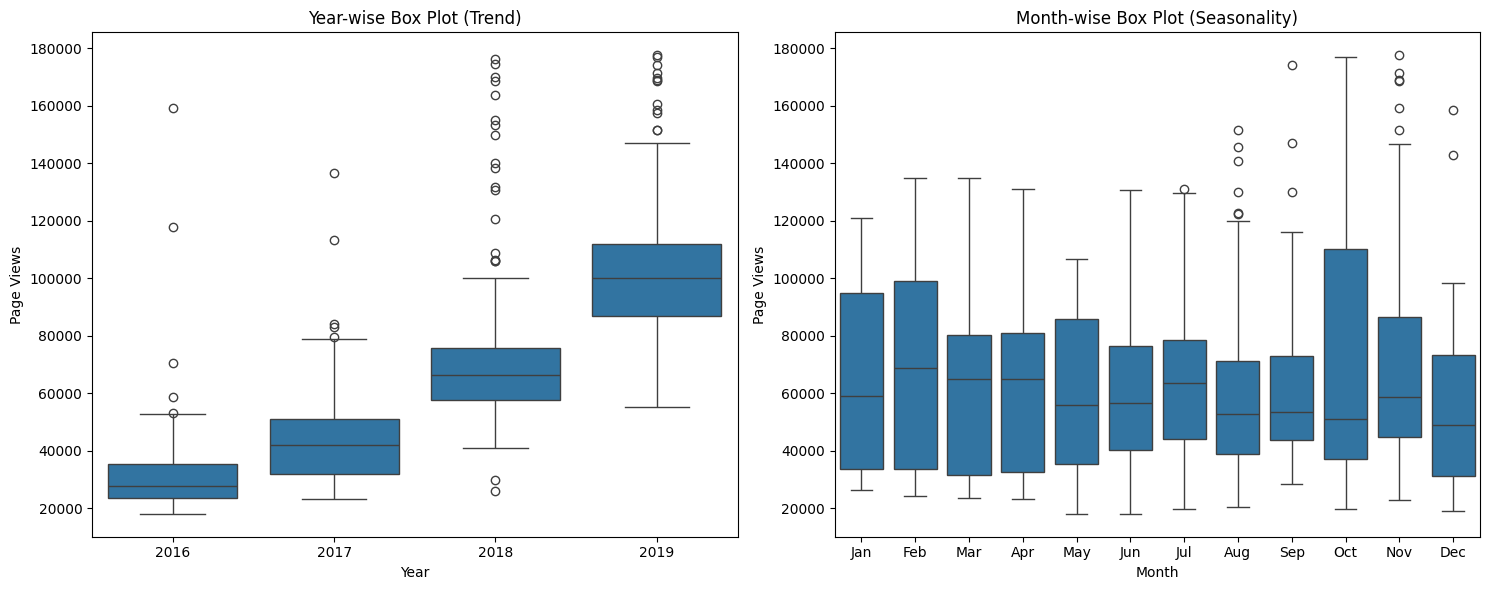

In [21]:
import matplotlib.pyplot as plt

# Test the functions
line_plot = draw_line_plot()
plt.show()

bar_plot = draw_bar_plot()
plt.show()

box_plot = draw_box_plot()
plt.show()